In [1]:
# project: p6
# submitter: tzhao86
# partner: none
# hours: 10

In [2]:
import pandas as pd
import numpy as np
import math
import sqlite3
import json
import geopandas as gpd
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

ModuleNotFoundError: No module named 'geopandas'

In [3]:
conn = sqlite3.connect("counties_tracts.db")

In [4]:
#q1
len(pd.read_sql_query("SELECT * FROM counties GROUP BY NAME", conn))

72

<AxesSubplot:>

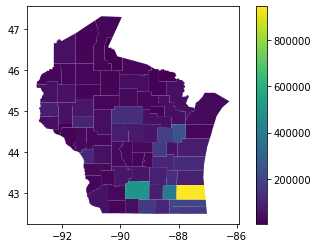

In [5]:
#q2
gdf = gpd.read_file("counties.geojson")
gdf.plot(column = "POP100", cmap = "viridis", legend = True)

In [6]:
gdf["AREALAND"] = pd.read_sql_query("SELECT AREALAND FROM counties", conn) 
train, test = train_test_split(gdf, random_state=320)

In [7]:
#q3
list(test["NAME"])

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [8]:
#q4
model = LinearRegression()
model.fit(train[["AREALAND"]], train["POP100"])
model.score(test[["AREALAND"]], test["POP100"])

0.022002661530554857

In [9]:
#q5
model.coef_[0] * 500 * 2.59 * 1000000 + model.intercept_

82032.53073541154

In [10]:
gdf = gpd.read_file("counties.geojson")
HU100_df = pd.read_sql_query("""
     SELECT counties.NAME, SUM(HU100) AS HU100
     FROM counties, tracts
     WHERE tracts.COUNTY = counties.COUNTY
     GROUP BY counties.COUNTY
     """, conn)
gdf = pd.merge(gdf, HU100_df, on="NAME")
train, test = train_test_split(gdf, random_state=320)
model = LinearRegression()
model.fit(train[["HU100"]], train["POP100"])

LinearRegression()

In [11]:
#q6
train.set_index('NAME').to_dict()['HU100']

{'Walworth County': 51531,
 'Marquette County': 9896,
 'Racine County': 82164,
 'Waupaca County': 25396,
 'Lincoln County': 16784,
 'Washburn County': 12979,
 'Door County': 23966,
 'Waukesha County': 160864,
 'Sheboygan County': 50766,
 'La Crosse County': 48402,
 'Langlade County': 12360,
 'Marathon County': 57734,
 'Jefferson County': 35147,
 'Price County': 11120,
 'Vilas County': 25116,
 'Columbia County': 26137,
 'Ozaukee County': 36267,
 'Fond du Lac County': 43910,
 'Crawford County': 8802,
 'Lafayette County': 7230,
 'Green County': 15856,
 'Marinette County': 30379,
 'Vernon County': 13720,
 'Douglas County': 22825,
 'Rock County': 68422,
 'Iowa County': 10719,
 'Dane County': 216022,
 'Bayfield County': 12999,
 'Polk County': 24248,
 'Trempealeau County': 12619,
 'Brown County': 104371,
 'Washington County': 54695,
 'Chippewa County': 27185,
 'Oconto County': 23537,
 'Richland County': 8868,
 'Portage County': 30054,
 'Sawyer County': 15975,
 'Menominee County': 2253,
 'Barr

In [12]:
#q7
scores = cross_val_score(model, train[["HU100"]], train["POP100"], cv=5)
scores_avg = scores.sum()/5
scores_avg

0.9652534544116037

In [13]:
#q8
scores.std()

0.03704265206670459

In [14]:
#q9
coef = model.coef_[0]
intercept = model.intercept_
result = "POP100 = %.2f*HU100 + %.2f" % (coef, intercept)
result

'POP100 = 2.39*HU100 + -7910.46'

In [15]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams.update({'font.size':16})

Text(216500, 470000, 'Dane')

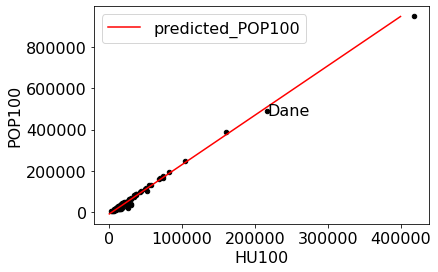

In [16]:
#q10
predict_df = pd.DataFrame({
    "HU100": range(0,400000)
})
predict_df["predicted_POP100"] = model.predict(predict_df[["HU100"]])
ax = predict_df.plot.line(x = "HU100", y = "predicted_POP100", color = "red")
gdf.plot.scatter(x = "HU100", y = "POP100", ax=ax, color = "black")
ax.text(x = 216500, y = 470000, s = "Dane")

In [17]:
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])

In [18]:
#q11
((A >= 2) & (A <= 5)).sum()

12

In [19]:
from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

In [20]:
import rasterio
land = rasterio.open("zip://../p6/land.zip!wi.tif")
url = "https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_Census2020/MapServer/82/query?where=NAME%3D%27Milwaukee+County%27&text=&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=geojson"
Milwaukee = gpd.read_file(url)
from rasterio.mask import mask
matrix, _ = mask(land, Milwaukee.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]

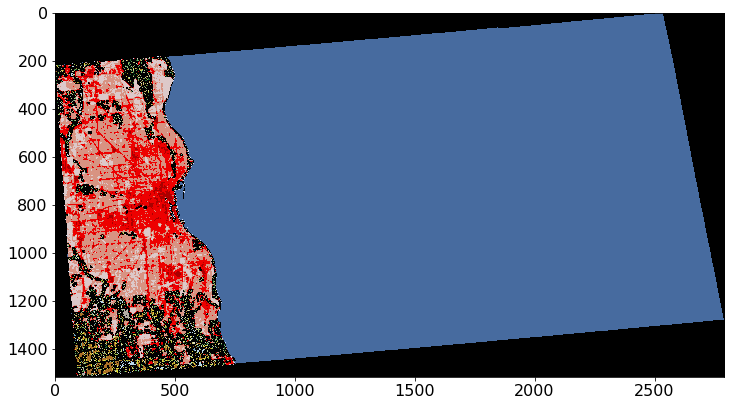

In [21]:
#q12
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(matrix, cmap = custom_cmap, vmin=0, vmax=255)

In [22]:
#q13
(matrix == 11).sum()/(matrix != 0).sum()

0.7963037455950543

In [23]:
gdf = gpd.read_file("counties.geojson")
developed_open_list = []
developed_low_list = []
developed_med_list = []
developed_high_list = []
for i in range (0,len(gdf.index)):
    county_info = gdf.iloc[i:i+1]
    matrix, _ = mask(land, county_info.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    developed_open_list.append((matrix == 21).sum())
    developed_low_list.append((matrix == 22).sum())
    developed_med_list.append((matrix == 23).sum())
    developed_high_list.append((matrix == 24).sum())
info_dict = {}
info_dict["developed_open"] = developed_open_list
info_dict["developed_low"] = developed_low_list
info_dict["developed_med"] = developed_med_list
info_dict["developed_high"] = developed_high_list
info_dict["POP100"] = list(gdf["POP100"])
land_df = pd.DataFrame(info_dict, index = list(gdf["NAME"]))

In [24]:
#q14
train, test = train_test_split(land_df, random_state=320)
result = train.iloc[:3].to_dict()
result

{'developed_open': {'Walworth County': 91733,
  'Marquette County': 43703,
  'Racine County': 54221},
 'developed_low': {'Walworth County': 86417,
  'Marquette County': 27193,
  'Racine County': 83597},
 'developed_med': {'Walworth County': 25760,
  'Marquette County': 4541,
  'Racine County': 59855},
 'developed_high': {'Walworth County': 8235,
  'Marquette County': 665,
  'Racine County': 23884},
 'POP100': {'Walworth County': 102228,
  'Marquette County': 15404,
  'Racine County': 195408}}

<AxesSubplot:xlabel='developed_open', ylabel='POP100'>

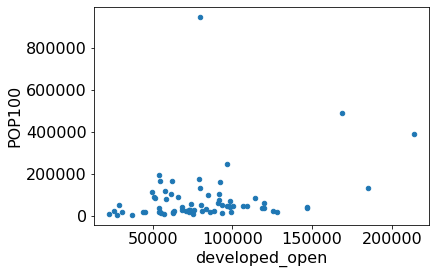

In [25]:
#q15
plot = land_df.plot.scatter(x = "developed_open", y = "POP100")
plot

In [26]:
poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression())
])
linear_model = LinearRegression()
poly_model.fit(train[["developed_open","developed_low","developed_med","developed_high"]], train["POP100"])
linear_model.fit(train[["developed_open","developed_low","developed_med","developed_high"]], train["POP100"])

LinearRegression()

In [27]:
#q16
linear_scores = cross_val_score(linear_model, train[["developed_open","developed_low","developed_med","developed_high"]], train["POP100"], cv=5)
poly_scores = cross_val_score(poly_model, train[["developed_open","developed_low","developed_med","developed_high"]], train["POP100"], cv=5)
(linear_scores.sum()/5, poly_scores.sum()/5)

(0.9181286409212669, 0.6490702789444955)

<AxesSubplot:ylabel='Avg Explained Variance'>

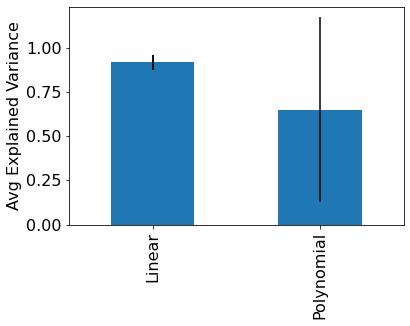

In [28]:
#q17
scores_df = pd.DataFrame()
scores_df.at["Linear", "score"] = linear_scores.mean()
scores_df.at["Linear", "std_dev"] = linear_scores.std()
ax = scores_df["score"].plot.bar(yerr=scores_df["std_dev"])
scores_df.at["Polynomial", "score"] = poly_scores.mean()
scores_df.at["Polynomial", "std_dev"] = poly_scores.std()
ax = scores_df["score"].plot.bar(yerr=scores_df["std_dev"])
ax.set_ylabel("Avg Explained Variance")
ax

<AxesSubplot:xlabel='Feature', ylabel='Weight'>

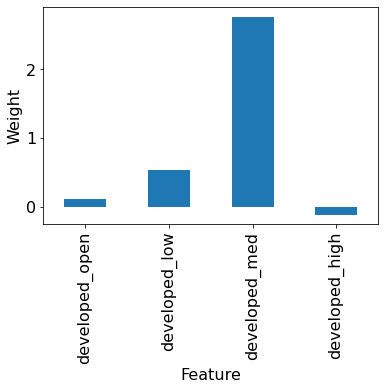

In [29]:
#q18
linear_coef_df = pd.DataFrame(linear_model.coef_, index = ["developed_open","developed_low","developed_med","developed_high"])
ax = linear_coef_df.plot.bar(legend = False)
ax.set_xlabel("Feature")
ax.set_ylabel("Weight")
ax

In [30]:
#q19
poly_coef_dict = {}
for i in range(0,len(poly_model[1].coef_)):
    coef_name = poly_model[0].get_feature_names_out()[i]
    coef_value = poly_model[1].coef_[i]
    poly_coef_dict[coef_name] = coef_value
poly_coef_dict

{'developed_open': -0.10421547981954869,
 'developed_low': 1.2925525095848176,
 'developed_med': -4.959212819522501,
 'developed_high': 13.195644532447844,
 'developed_open^2': 1.8580256379019389e-06,
 'developed_open developed_low': -1.9531480201062656e-05,
 'developed_open developed_med': 8.182470913425943e-05,
 'developed_open developed_high': -0.00010695600475867095,
 'developed_low^2': 3.5293004807535056e-05,
 'developed_low developed_med': -0.0002326425087280648,
 'developed_low developed_high': 0.00025876108520569985,
 'developed_med^2': 0.0005602988332727987,
 'developed_med developed_high': -0.0017321013682364689,
 'developed_high^2': 0.001572181162921871}

In [31]:
#q20
linear_model.score(test[["developed_open","developed_low","developed_med","developed_high"]],test["POP100"])

0.8659776114700685

In [32]:
conn.close()